In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


# Set display option so that all rows are shown
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [80]:
# Load csv
csv_path = "testoutput.csv"
bench = pd.read_csv(csv_path)
bench

,id,num_clases,num_images,image_size,batch_size,buffer_size,epoch_no,epoch_read_time
0,disk,10,100,15,32,10,0,0.013894
1,disk,10,100,15,32,10,1,0.013120
2,disk,10,100,15,32,10,2,0.012595
3,disk,10,100,15,32,10,3,0.015221
4,disk,10,100,15,32,10,4,0.012351
5,disk,10,100,15,32,100,0,0.013884
6,disk,10,100,15,32,100,1,0.012433
7,disk,10,100,15,32,100,2,0.018250
8,disk,10,100,15,32,100,3,0.013157
9,disk,10,100,15,32,100,4,0.012392


In [81]:
# Benchmark are run for 5 epochs, we group them by runs, find the mean and then expand back
bmt = bench.groupby(["id","num_clases","num_images","image_size","batch_size","buffer_size"]).aggregate(np.mean).reset_index()
bmt

,id,num_clases,num_images,image_size,batch_size,buffer_size,epoch_no,epoch_read_time
0,disk,10,100,15,32,10,2,0.013436
1,disk,10,100,15,32,100,2,0.014023
2,disk,10,100,15,32,500,2,0.013507
3,disk,10,100,15,32,1000,2,0.015135
4,disk,10,100,15,64,10,2,0.012800
5,disk,10,100,15,64,100,2,0.012958
6,disk,10,100,15,64,500,2,0.013556
7,disk,10,100,15,64,1000,2,0.014093
8,disk,10,100,15,128,10,2,0.012439
9,disk,10,100,15,128,100,2,0.013336


In [82]:
output = bmt.loc[(bmt['image_size'] == 15) & (bmt['batch_size'] == 64) & (bmt['buffer_size'] == 100)]
output

,id,num_clases,num_images,image_size,batch_size,buffer_size,epoch_no,epoch_read_time
5,disk,10,100,15,64,100,2,0.012958
37,disk,10,200,15,64,100,2,0.021230
69,flash,10,100,15,64,100,2,0.012561
101,flash,10,200,15,64,100,2,0.018076


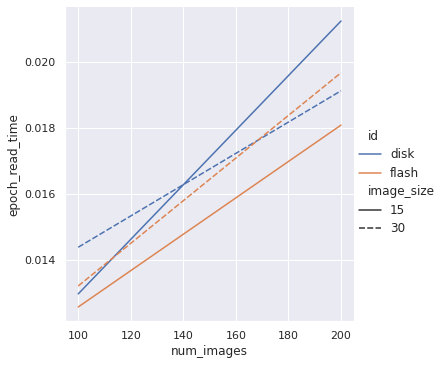

In [83]:
# Fixing batch size and buffer size
output = bmt.loc[(bmt['batch_size'] == 64) & (bmt['buffer_size'] == 100)]
sns.relplot(x="num_images", y="epoch_read_time", hue='id', style='image_size', data=output, kind="line")

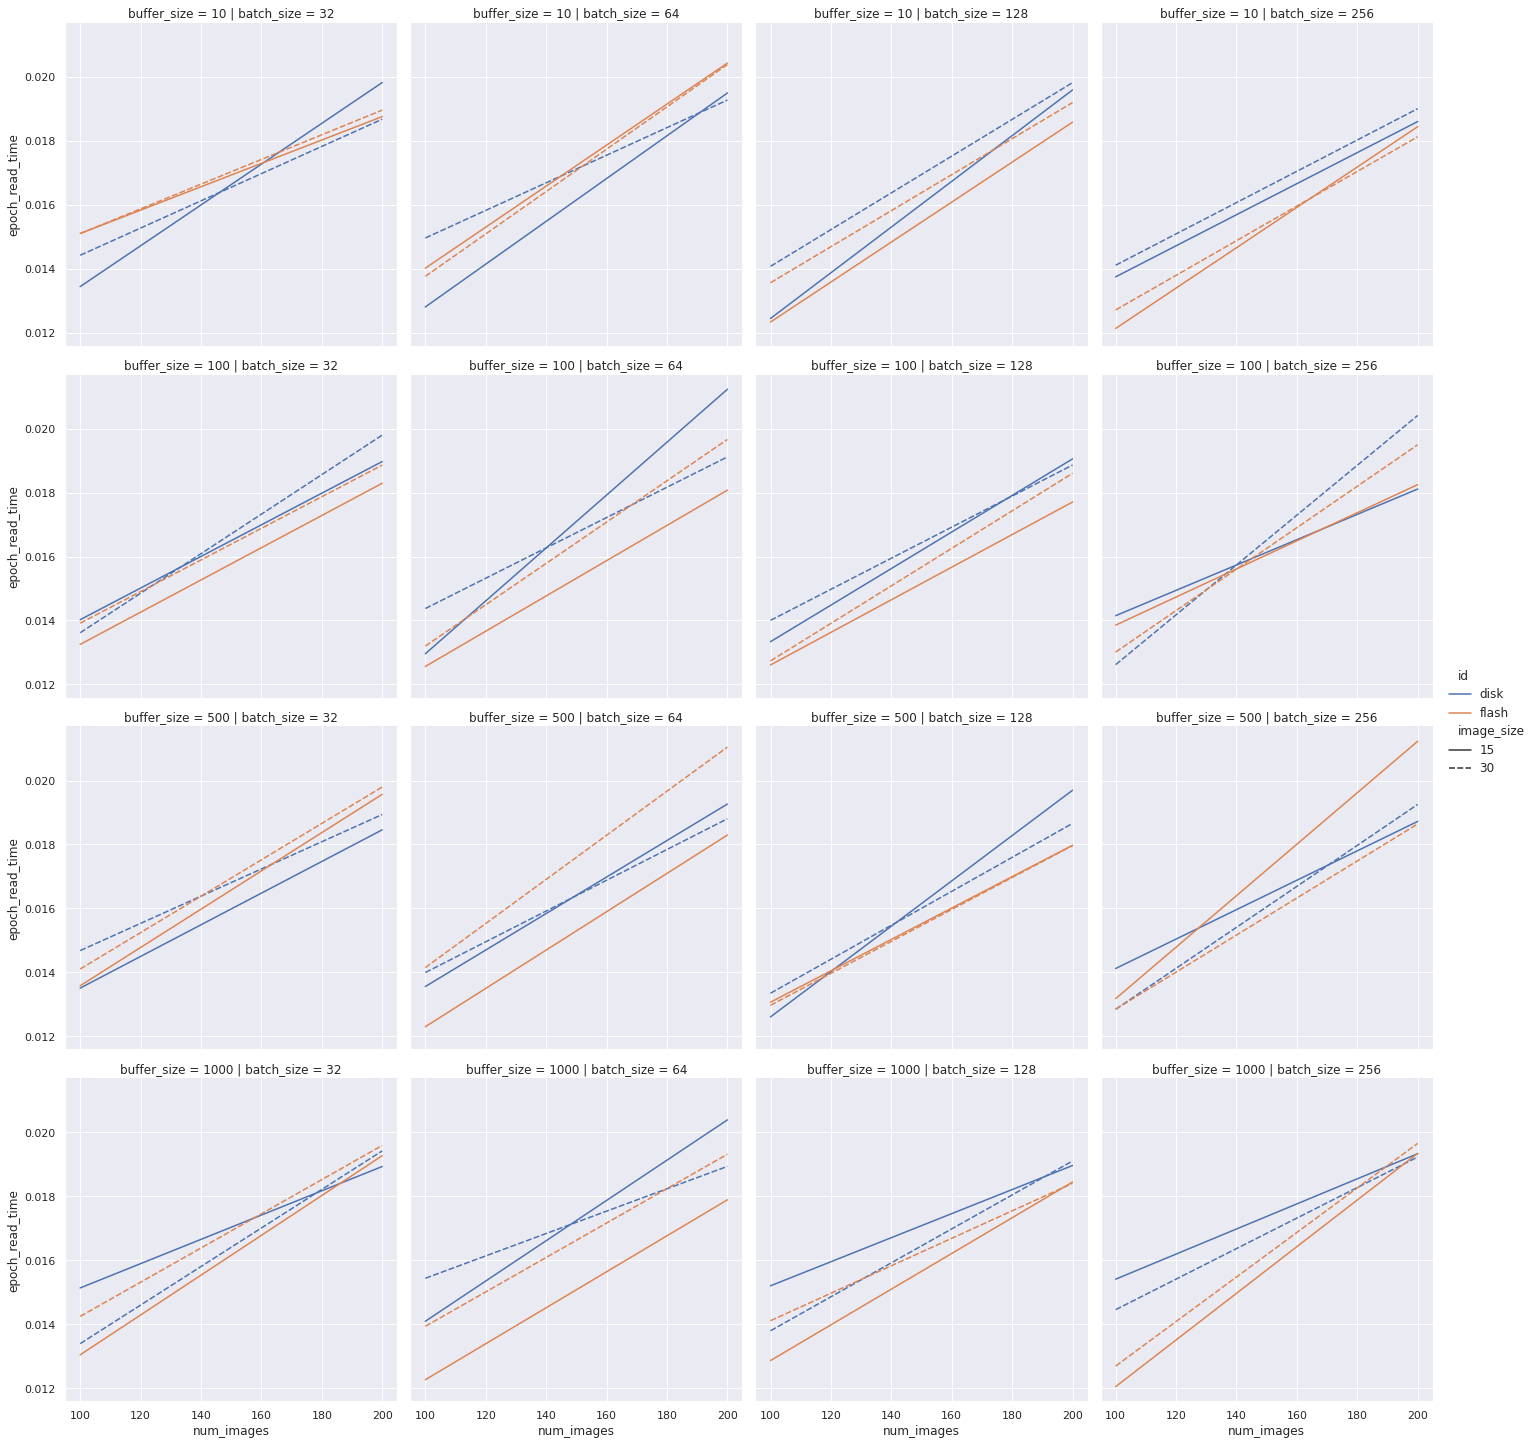

In [84]:
# Num images vs time
sns.relplot(x="num_images", y="epoch_read_time", hue='id', style='image_size', data=bmt, kind="line", col="batch_size", row="buffer_size")

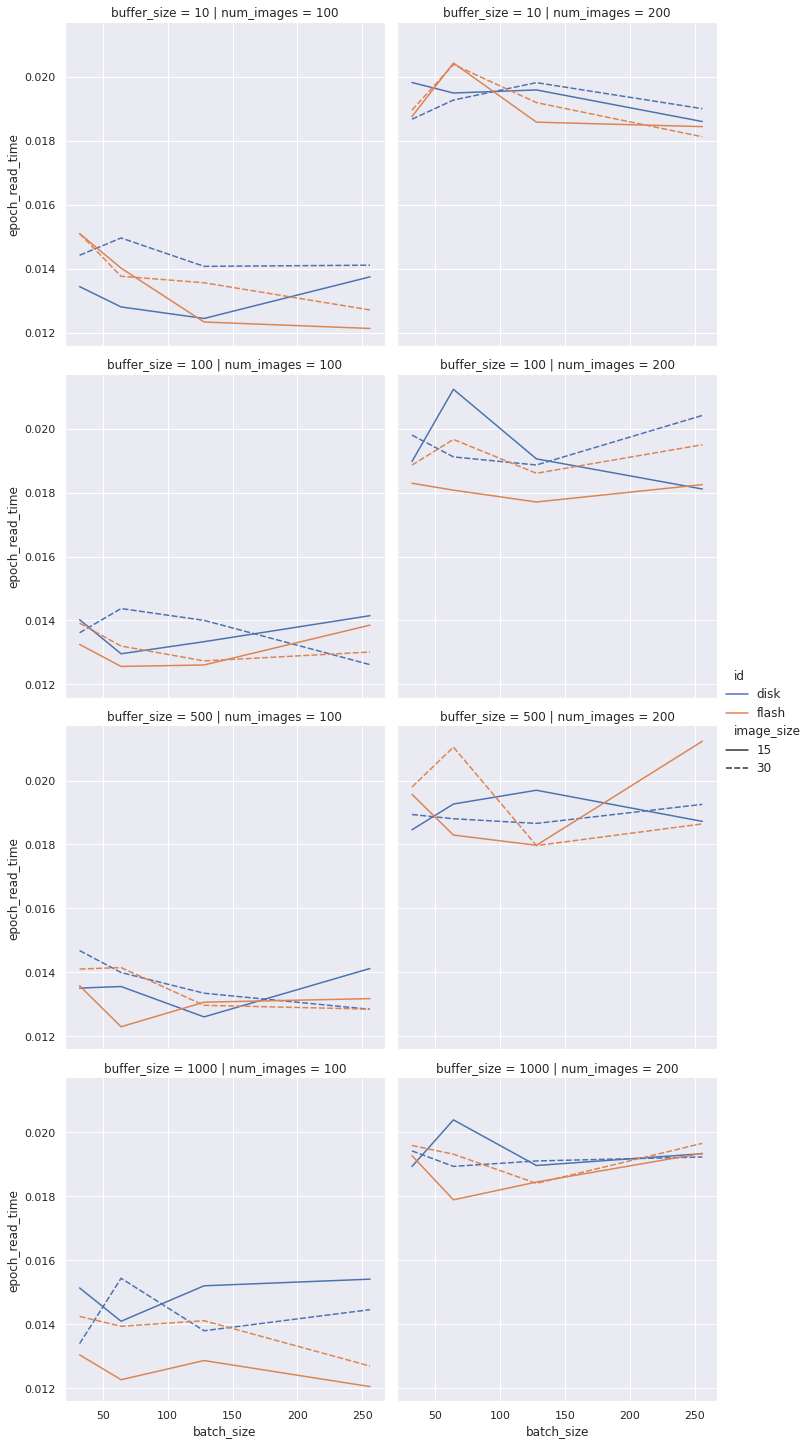

In [85]:
# Batch size vs time
sns.relplot(x="batch_size", y="epoch_read_time", hue='id', style='image_size', data=bmt, kind="line", col="num_images", row="buffer_size")

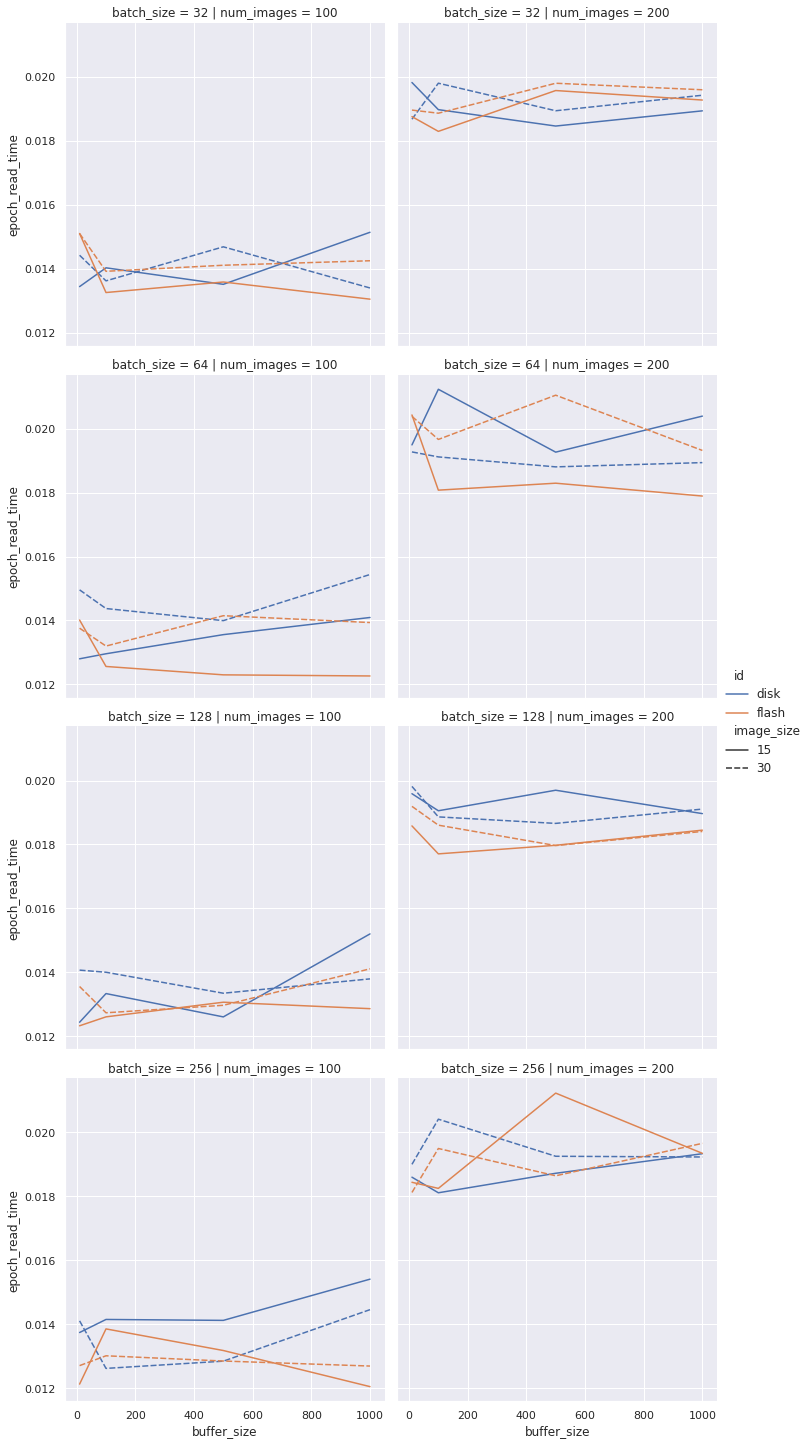

In [86]:
# Buffer size vs time
sns.relplot(x="buffer_size", y="epoch_read_time", hue='id', style='image_size', data=bmt, kind="line", col="num_images", row="batch_size")